In [ ]:
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
import Transform
import model
import loss
import Train

path="F:\data\data\\"
X_train,X_val,X_test,y_train,y_val,y_test=Transform.transform(path)

In [4]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 4, 4, 512])
y = tf.placeholder(tf.int64, [None])
is_training = tf.placeholder(tf.bool)

y_out = model.simple_model(X,y,is_training)
mean_loss,train_step=loss.loss(y_out,y)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Training
Iteration 0: with minibatch training loss = 4.72 and accuracy of 0.012
Epoch 1, Overall loss = 1.97 and accuracy of 0.472


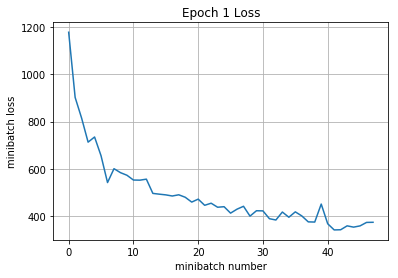

validation_accuracy:
0.36666666666666664
Epoch 2, Overall loss = 0.673 and accuracy of 0.821


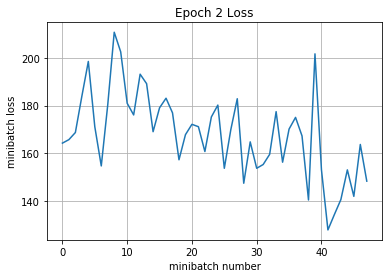

validation_accuracy:
0.475
Iteration 100: with minibatch training loss = 0.307 and accuracy of 0.94
Epoch 3, Overall loss = 0.242 and accuracy of 0.959


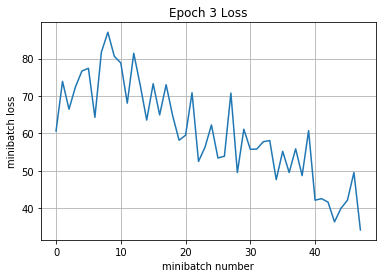

validation_accuracy:
0.4666666666666667
Epoch 4, Overall loss = 0.0893 and accuracy of 0.992


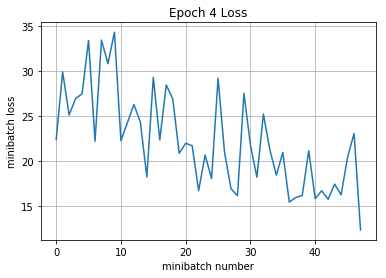

validation_accuracy:
0.575
Iteration 200: with minibatch training loss = 0.0499 and accuracy of 1
Epoch 5, Overall loss = 0.0448 and accuracy of 0.998


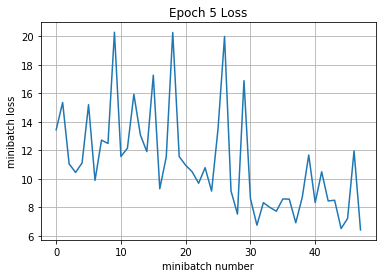

validation_accuracy:
0.6583333333333333
Epoch 6, Overall loss = 0.0234 and accuracy of 0.999


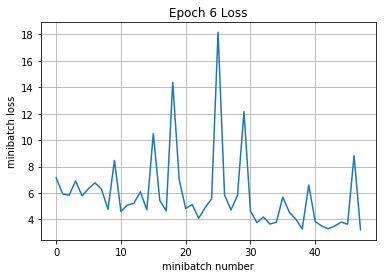

validation_accuracy:
0.6416666666666667
Iteration 300: with minibatch training loss = 0.0167 and accuracy of 1
Epoch 7, Overall loss = 0.0163 and accuracy of 0.999


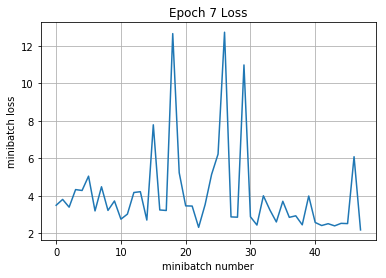

validation_accuracy:
0.6416666666666667
Validation
validation_accuracy:
0.62


In [11]:
with tf.Session() as sess:
    with tf.device("/gpu:0"): 
        sess.run(tf.global_variables_initializer())
        print('Training')
        Train.run_model(sess,y_out,mean_loss,X_train,y_train,7,250,100,train_step,True)
        print('Validation')
        predict,idx=Train.val_model(sess,y_out,mean_loss,X_val,y_val,1,100)

In [12]:
print(predict)
print(idx)

[20. 39.  0.  2.  7. 26. 27. 21.  5. 17. 25. 18. 20. 31. 11.  5. 15.  6.
 36. 39. 34. 11. 11.  1. 18. 35. 23. 13. 11. 24.  6.  6. 16. 39. 29. 13.
 27. 28. 10. 12. 11. 19. 16. 21. 10. 32. 19.  4. 33. 34. 13. 14. 24. 26.
  5.  7.  1. 21.  2. 18.  0. 39. 21. 27. 39. 23. 15. 11. 33.  6. 11. 13.
 15. 34. 27. 27. 29. 13. 31.  8.  8. 30. 21. 31.  7.  0.  6. 12. 24. 11.
 31. 39. 12. 10. 34. 27.  8. 16.  6. 16.]
[ 516 1038 1229  710   43  897 1266  961  677  766  952  240  900  225
  171  353 1077  684 1200  130 1301 1175  966  860  413   86 1310 1048
  946  876  347 1324  573  981  112  879 1305  858  392   35  154 1043
  829  832  500 1272  149   67  177  854 1055   22  845  196  473  575
  752  362  373  683  477  536 1198  746  927 1087  235 1084 1102  121
  168  119 1263  775  511  409 1011 1163 1329  311  794 1006  941 1179
 1303  827  945  538  928  258 1209  978 1290   75  437   78  264 1103
   26  934]


In [ ]:
index=np.load('index.npy')